<br>
<h1 style="font-family:sans-serif; text-align:center"> 
<!--     <span style='color: pink'> Twitter analysis of </span> -->
    <span style='color: white; font-size:50%; text-shadow: 0px 0px 15px black'> Twitter analysis of </span>
<!--     <span style='color:#00acee'> Twitter analysis of </span> -->
<!--     <span style="-webkit-text-stroke"> Twitter analysis of</span> -->
<!--     <span class="hr3" style='color:#e40843; letter-spacing: 4px; font-size:105%'> Canada</span> -->
    <span class="hr3" style='color:#e40843; font-size:60%; text-shadow: 0px 0px 30px pink'>Canada </span> <span class="hr3" style='color:gray; font-size:50%; text-shadow: 0px 0px 30px pink'>response to Covid-19</span><br>
</h1>

# Sentiment Analysis

The aim of this notebook is to analyze the retrieved tweets obtained using *snscrape*, from March 1st to April 30th of 2020, from Government of Canada official Twitter accounts.

_Authors: Leo Cuspinera ([cuspime](https://github.com/cuspime)) and Victor Cuspinera ([vcuspinera](https://github.com/vcuspinera))_

## Import libraries

In [1]:
# General libraries
import pandas as pd
import numpy as np
import os
import time
from datetime import datetime, timedelta, date
# from pytz import timezone
# import json

# To plot
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import altair as alt
alt.renderers.enable('mimetype')

# Preprocess libraries
import re
import spacy
import string
import en_core_web_sm
nlp = en_core_web_sm.load()

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# WordCloud:
from textblob import TextBlob
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Necessary to plot timeseries:
pd.plotting.register_matplotlib_converters()

## Open `json` file with all tweets

In [2]:
# Parameters
my_folder = "../tweets/"

# Open `json` file with all tweets
df_tot = pd.read_json(my_folder + 'tweets_db_clean.json')

## Clean dataset

### Add day

In [4]:
# add column with day
%time df_tot['day'] = [df_tot['date'][i].strftime("%Y-%m-%d") for i in range(len(df_tot))]

CPU times: user 1min 24s, sys: 78.2 ms, total: 1min 24s
Wall time: 1min 24s


### Dummie variable of the Accouncement

In [14]:
df_tot['announcement'] = df_tot['day'] >= "2020-03-27"

### Select only tweets in English
We keep 83.2% of the tweets, and we could use different packages for sentiment analysis and tokens.

In [20]:
df = df_tot[df_tot['lang']=='en'].reset_index(drop=True)
df.tail(3)

,account,date,replyCount,retweetCount,likeCount,quoteCount,lang,sourceLabel,username,followersCount,friendsCount,location,tweet,day,announcement
2915142,JustinTrudeau,2020-04-30 00:00:27,1,0,2,0,en,Twitter for iPhone,SRodrigues52,219,412,"London, On",@shelbzzzzy @justintrudeau quit your job 🧐,2020-04-30,True
2915143,JustinTrudeau,2020-04-30 00:00:19,1,0,0,0,en,Twitter for iPhone,pffoote,356,1531,"St. John's, NL, Canada",@rcaf_arc @cfsnowbirds @canadianforces @cfoper...,2020-04-30,True
2915144,JustinTrudeau,2020-04-30 00:00:08,0,0,0,0,en,Twitter Web App,DavidCBarron,231,331,Brampton Ontario,@cbcnews @ctvnews @justintrudeau @celliottabil...,2020-04-30,True


## Analysis

In [21]:
stopwords = set(STOPWORDS)
stopwords.update(['lo','u',"I'm","We'll", 'Nous', 'di', 'Herr', 'ist','de','die',
                  'a','por','https','I', 'noch', 'much', 'uns', 'many', 'day', 'come',
                  'los', 'eine', 'wie', 'aut', 'les', 'sind','un', 'et','il','le','las',
                  'la', 'nos','will', 'dan', 'se', 'au', 'una', 'unas','le','aut','and',
                  'den', 'ein', 'al', 'des','_','il', 'e', 'en', 'que',
                  'non', 'da', 'Ich', 'la', 'mit', 'zu', 'es', 'con', 'von', 'und', 'auf', 'auch','sich', 'der', 'hasta', 'das', 'Sie', 'para', 'el', 'per'])

def CleanText(txt):
    txt = re.sub(r'https?:\/\/.*[\r\n]*','',txt) # Remove hyperlinks
    # Remove some nonsense
    txt = re.sub(r'dans le','',txt)
    txt = re.sub(r'Sie uns','',txt)
    txt = re.sub(r'RT[\s]+','',txt) # remove retweets
    txt = re.sub(r'\d+','',txt) #remove digits
#     txt = re.sub(r' https://twitter.com/AFairGoAUS/status/1297320236253769729', '', txt)
    txt = re.sub(' '+' | '.join(stopwords).lstrip(' | ')+' ',' ',txt ) # 🔥 This is the right way to remove stopwords, they're just gone
    
    return txt

### Wordcloud of all tweets

In [22]:
allwords = ' '.join(df.tweet.values.tolist())
# allwords = df.tweet.values.tolist()

mask = np.array(Image.open('../img/Canadian_Flag.jpg'))


In [23]:
wcloud = WordCloud(width=3000, height=1700, random_state=11, max_font_size=211, background_color='white',
                max_words=400, collocations=False, mode='RGBA',mask=mask, #stopwords=stopwords#,
                  #font_path='C://WINDOWS//FONTS//LATOWEB-LIGHT.TTF'
                  ).generate(allwords)


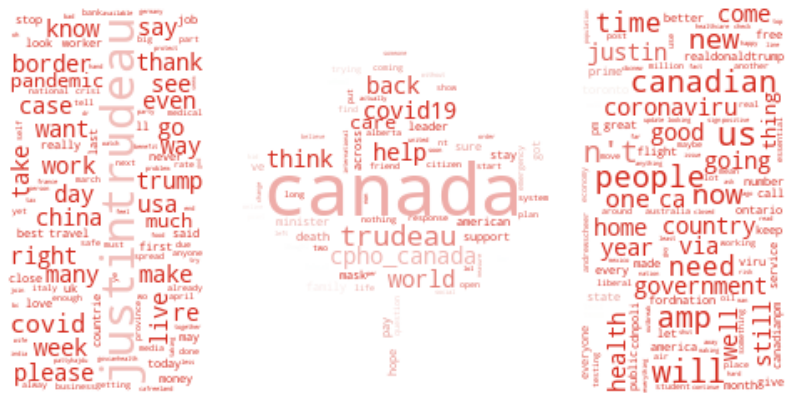

In [24]:
plt.figure(figsize=(14,8))

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.imshow(wcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("../img/canada_word_cloud.jpg", format="jpg")

In [16]:
wcloud.words_.keys()

dict_keys(['canada', 'justintrudeau', 'us', 'will', "n't", 'amp', 'people', 'canadian', 'new', 'now', 'trudeau', 'need', 'time', 'one', 'covid', 're', 'coronaviru', 'covid19', 'know', 'help', 'day', 'thank', 'government', 'country', 'cpho_canada', 'say', 'border', 'right', 'case', 'home', 'work', 'health', 'good', 'live', 'go', 'world', 'back', 'china', 'make', 'still', 'think', 'please', 'want', 'justin', 'year', 'see', 'trump', 'usa', 'well', 'going', 'even', 'take', 'many', 'ca', 'way', 'via', 'week', 'come', 'pandemic', 'thing', 'much', 'care', 'realdonaldtrump', 'pm', 'countrie', 'minister', 'let', 'job', 'stop', 'today', 'first', 'love', 'great', 'viru', 've', 'month', 'better', 'mask', 'keep', 'ontario', 'stay', 'state', 'uk', 'cdnpoli', 'look', 'got', 'travel', 'death', 'support', 'every', 'free', 'really', 'money', 'best', 'american', 'prime', 'leader', 'america', 'flight', 'fordnation', 'said', 'canadianpm', 'number', 'last', 'never', 'pay', 'toronto', 'family', 'everyone', '

In [33]:
df_weights = pd.DataFrame.from_dict(wcloud.words_, orient='index').reset_index().rename(columns={'index':'word', 0:'weight'})

In [53]:
pd.DataFrame(wcloud.layout_)[1]
wcloud.layout_
# df_weights

[(('canada', 1.0), 44, (92, 153), None, 'rgb(238, 172, 168)'),
 (('justintrudeau', 0.27972462810215887),
  28,
  (6, 55),
  2,
  'rgb(241, 189, 185)'),
 (('us', 0.12201147569252575), 20, (72, 425), None, 'rgb(213, 43, 30)'),
 (('will', 0.11486830217288191), 19, (210, 385), None, 'rgb(213, 43, 30)'),
 (("n't", 0.10124032601184207), 18, (80, 345), None, 'rgb(226, 121, 113)'),
 (('amp', 0.09891689174980875), 18, (182, 389), None, 'rgb(213, 43, 30)'),
 (('people', 0.0989091512692023), 18, (94, 352), None, 'rgb(212, 42, 29)'),
 (('canadian', 0.09412123398741828), 18, (37, 373), None, 'rgb(213, 43, 30)'),
 (('new', 0.08205425474867735), 17, (16, 408), None, 'rgb(213, 43, 30)'),
 (('now', 0.08035822944246608), 17, (109, 410), None, 'rgb(213, 43, 30)'),
 (('trudeau', 0.07774710731789337),
  17,
  (130, 199),
  None,
  'rgb(229, 127, 120)'),
 (('need', 0.07167556033554123), 16, (148, 396), None, 'rgb(213, 43, 30)'),
 (('time', 0.07165233889372191), 16, (2, 352), None, 'rgb(212, 42, 29)'),
 (('o

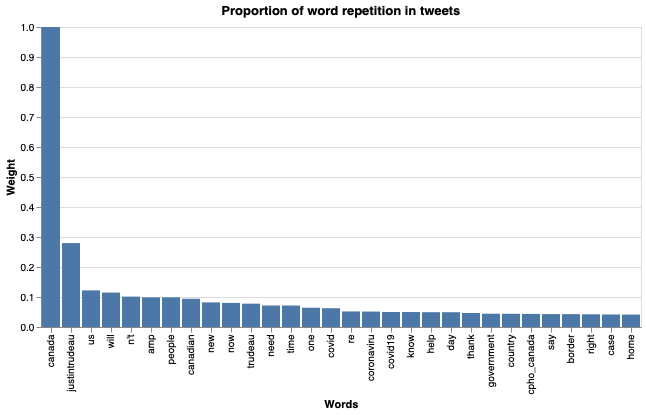

In [43]:
alt.Chart(df_weights[:30]).mark_bar().encode(
    x=alt.X('word', sort=df_weights.word.to_list(), title="Words"),
    y=alt.Y('weight', title="Weight")
).properties(
    title="Proportion of word repetition in tweets"
)

0      44
1      28
2      20
3      19
4      18
       ..
274     4
275     4
276     4
277     4
278     4
Name: 1, Length: 279, dtype: int64